#Lição de casa PSI5790 - Aula 9

Nome: Jean Caros Mello Xavier Faria

Nusp: 11259628

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 20)        1520      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 20)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 40)        20040     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 40)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1000)             

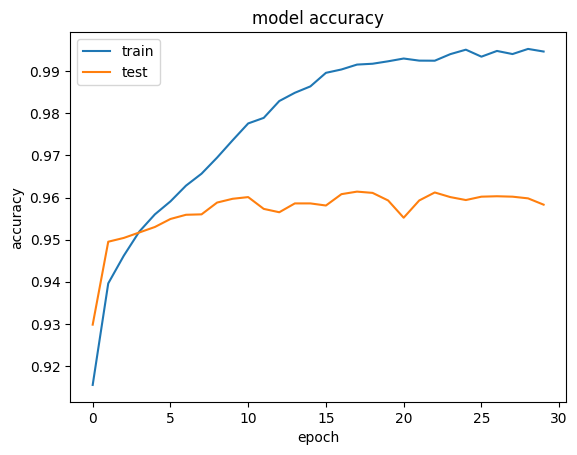

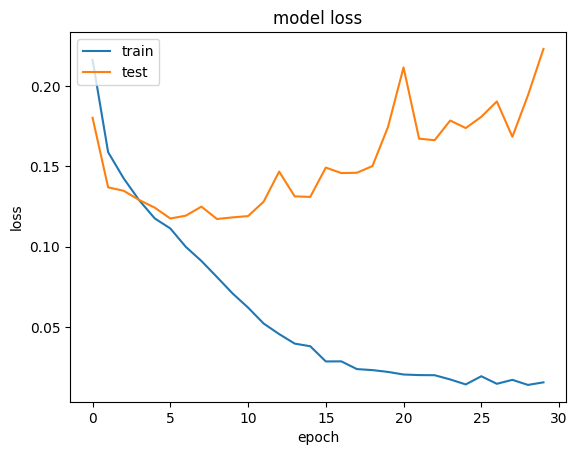

313/313 - 1s - loss: 0.2231 - accuracy: 0.9583 - 729ms/epoch - 2ms/step
Test loss: 0.22307197749614716
Test accuracy: 0.958299994468689


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#cnn1.py
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt; import numpy as np
def impHistoria(history):
  print(history.history.keys())
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy'); plt.ylabel('accuracy'); plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss'); plt.ylabel('loss'); plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

batch_size = 100; num_classes = 1; epochs = 30
nl, nc = 32,32
(ax, ay), (qx, qy) = cifar10.load_data()

input_shape = (nl, nc, 3)
ax = ax.astype('float32'); ax /= 255; ax -=0.5; #-0.5 a +0.5
qx = qx.astype('float32'); qx /= 255; qx -=0.5; #-0.5 a +0.5

ay_new = np.array([])
qy_new = np.array([])

for value in ay:
  if(value != 6):
    ay_new = np.append(ay_new, 0)
  else:
    ay_new = np.append(ay_new, 1)

for value in qy:
  if(value != 6):
    qy_new = np.append(qy_new, 0)
  else:
    qy_new = np.append(qy_new, 1)

model = Sequential()
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='sigmoid'))
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True)
model.summary()
opt=optimizers.Adam()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(ax, ay_new, batch_size=batch_size, epochs=epochs,verbose=2, validation_data=(qx, qy_new))
impHistoria(history)
score = model.evaluate(qx, qy_new, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('cnn1.h5')

In [ ]:
y_predict = model.predict(qx)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = (y_predict >= 0.5).astype(int)
TP = np.sum(np.logical_and(qy_new == 1, y_pred == 1))
TN = np.sum(np.logical_and(qy_new == 0, y_pred == 0))
FP = np.sum(np.logical_and(qy_new == 0, y_pred == 1))
FN = np.sum(np.logical_and(qy_new == 1, y_pred == 0))
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensibilidade = ", sensitivity*100)
print("Especificidade = ", specificity*100)

Sensibilidade =  7.430000000000001
Especificidade =  92.57


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(qy_new, y_predict)
auc_score = auc(fpr, tpr)

print("AUC = ", 100*auc_score)
eer_threshold = thresholds[np.nanargmin(np.abs(fpr - (1 - tpr)))]
print("EER = ", 100*eer_threshold)

AUC =  96.81738333333334
EER =  0.08174691465683281


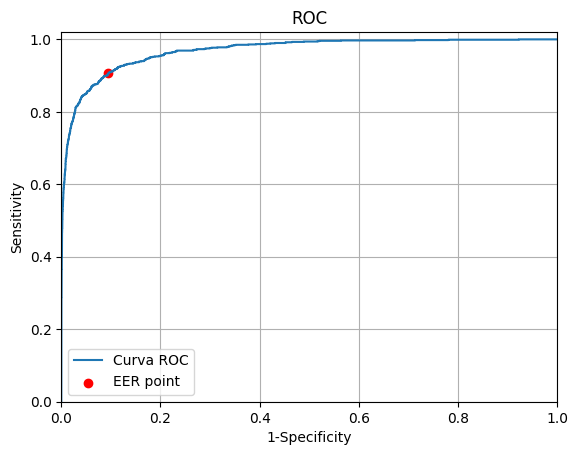

In [ ]:
plt.plot(fpr, tpr, label='Curva ROC')
eer_fpr = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]
eer_tpr = tpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]

plt.scatter(eer_fpr, eer_tpr, marker='o', color='red', label='EER point')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC')
plt.legend()
plt.grid()